### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import metrics

### Read IMDB Dataset

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### View descriptive stats

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Check for imbalanced data

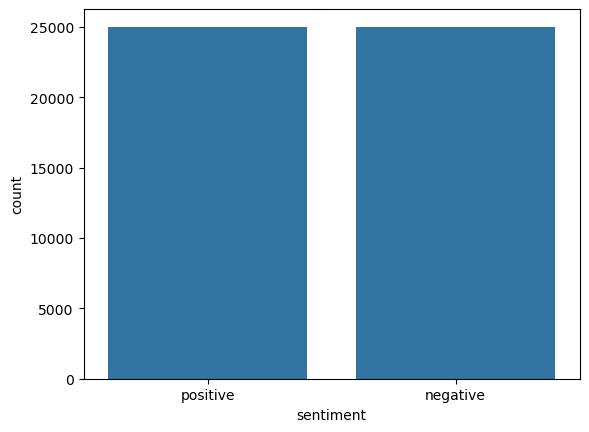

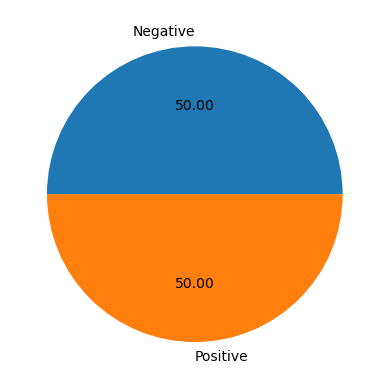

In [7]:
sns.countplot(x = 'sentiment', data = df)
plt.show()
plt.pie(df['sentiment'].value_counts(), labels = ['Negative','Positive'], autopct = '%0.2f')
plt.show()

### Create a function to Preprocess the review column

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_review(text):
    # Handle missing values
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join words back to sentence
    return " ".join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df['clean_review'] = df['review'].apply(preprocess_review)
df['clean_review'].head()

0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: clean_review, dtype: object

### Print some text after applying the function

One of the other reviewers have mention that after watch just 1 Oz episode you ll be hook They be right as this be exactly what happen with me br br The first thing that strike me about Oz be its brutality and unflinching scenes of violence which set in right from the word GO Trust me this be not a show for the faint hearted or timid This show pull no punch with regard to drug sex or violence Its be hardcore in the classic use of the word br br It be call OZ as that be the nickname give to the Oswald Maximum Security State Penitentary It focus mainly on Emerald City an experimental section of the prison where all the cells have glass front and face inwards so privacy be not high on the agenda Em City be home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffle death star dodgy deal and shady agreements be never far away br br I would say the main appeal of the show be due to the fact that it go where other show wouldn t dare Forget pretty picture paint 

### Split the dataset into Input (X) & Target (y) variable

In [16]:
X = df['clean_review']    


In [17]:
y = df['sentiment']     

### Convert y variable values into 0 and 1 from positive and negative

In [18]:
y = y.map({'negative': 0, 'positive': 1})


In [19]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [22]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(
    X_seq,
    maxlen=200,      
    padding='post',
    truncating='post'
)


In [23]:
print(X_pad.shape)
print(X_pad[0])


(50000, 200)
[   4 1010  935   67 3049  175  366 2885  106  497  482    1   24   27
 2952 3049 4912    1   16  483  129  106  249   32 1555   23    1    1
    1   23  897 2013 2034  632  280  483 3116  225  251    1  369 3049
    1  254    1    1 2334  583    1  752 1231    1  396 4259 1944 1030
 1945 1803  811  240    1    1  228 4071 3356  396  242    1 3765    1
    1 1172  859 2248    1    1  214 3785    1 1636    1    1   42  137
    1   12   41  186 1049   23  547   89   32   23  449 2400  696   94
  247 3884 2285  164  696 1124  696    1   68  823   98   24  175   49
  117 2952 1427 2014  304   41 1404  192 1320  962 3049  101    1  228
  436 1238  483  483    1    1 1917    1 2687    1 4820    1  268  450
    9  151   18    1  634  605 4820  542 1030 4989  547  333  567 1158
 1030  382   67 3049  105  316 3411 2974    1    9  777 3635  349    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

### Split the dataset into Training & Testing set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,        
    random_state=42,
    stratify=y            
)


### Create keras Sequential Model with LSTM Layers

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [26]:
model = Sequential()

# Embedding Layer
model.add(Embedding(
    input_dim=5000,     
    output_dim=128,     
    input_length=200     
))


model.add(LSTM(128, return_sequences=False))


model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))


C:\Users\Harsha\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compile the model

In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Train the model with our training set

In [34]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,              
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 299ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5214 - val_loss: 0.6913
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 273ms/step - accuracy: 0.5630 - loss: 0.6720 - val_accuracy: 0.6686 - val_loss: 0.6254
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.7135 - loss: 0.5552 - val_accuracy: 0.8575 - val_loss: 0.3455
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.8811 - loss: 0.2985 - val_accuracy: 0.8736 - val_loss: 0.3052
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 435ms/step - accuracy: 0.9094 - loss: 0.2370 - val_accuracy: 0.8792 - val_loss: 0.2984


### Make prediction with X_test

In [51]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step


In [52]:
y_pred

array([[0.52266663],
       [0.6819581 ],
       [0.989698  ],
       ...,
       [0.01373305],
       [0.9786519 ],
       [0.43267506]], shape=(10000, 1), dtype=float32)

### Convert to 0 and 1 with higher probability towards 1

In [55]:
y_pred = (y_pred>= 0.5).astype(int)

Evaluate the model

In [56]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8792 - loss: 0.2984


[0.29844021797180176, 0.8791999816894531]

### Check accuracy score

In [60]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8792


### Check confusion matrix

<Axes: >

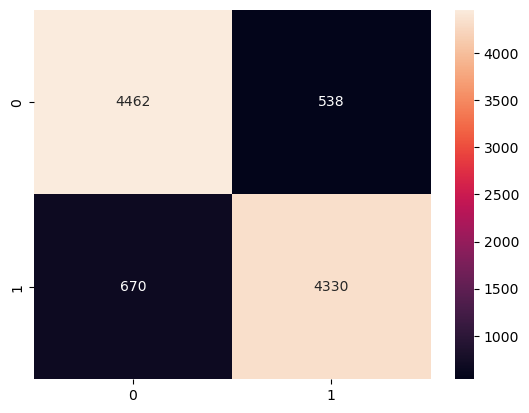

In [64]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print Classification report

In [66]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=['Negative', 'Positive']
))


              precision    recall  f1-score   support

    Negative       0.87      0.89      0.88      5000
    Positive       0.89      0.87      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



***